In [ ]:
# Install yfinance library
%pip install -q yfinance --upgrade --no-cache-dir
%pip install -q pandas==1.5.3

In [1]:
# Import the necessary libraries
import pandas as pd
import yfinance as yf
import bs4 as bs
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import requests
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lib.utils.helpers import get_stock_symbols, extract_numerical_columns, get_snp_companies, get_cols_to_be_divided_by_total_assets
from lib.utils.stocks import get_meta_data
warnings.filterwarnings("ignore")

In [2]:
# from lib.utils.stocks import build_stocks
# from datetime import date
# today = date.today()

# today_str = today.strftime("%Y-%m-%d")
# build_stocks(f"lib/stocks/quarterly_statements_{today_str}.csv")

In [3]:
stocks = pd.read_csv("./lib/stocks/quarterly_statements_2024-03-30.csv",index_col=0, parse_dates=True)

In [4]:
# getting all top 1500 US companies 
stock_symbols = get_stock_symbols()

In [5]:
stocks = stocks.loc['2020-01-01':]
stocks = stocks.loc[stocks.ticker.isin(stock_symbols)]
stocks['end_of_quarter'] = stocks.index

In [6]:
# from datetime import date
# today = date.today()

# today_str = today.strftime("%Y-%m-%d")
# meta_df = get_meta_data(stock_symbols=stock_symbols, stocks=stocks)
# meta_df.to_csv(f'meta_df_{today_str}.csv', index=False)

  2%|▏         | 31/1506 [02:55<2:28:42,  6.05s/it]

index -1 is out of bounds for axis 0 with size 0 REX


  4%|▍         | 65/1506 [06:14<1:56:25,  4.85s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 CWEN.A


  5%|▌         | 78/1506 [07:28<2:01:54,  5.12s/it]

index 0 is out of bounds for axis 0 with size 0 IPG earnings_date=pd.Timestamp


 10%|█         | 158/1506 [14:21<1:32:20,  4.11s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 AMEH


 11%|█         | 165/1506 [14:58<1:56:19,  5.20s/it]FBRT: Data doesn't exist for startDate = 1581829200, endDate = 1589601600
FBRT: Data doesn't exist for startDate = 1589515200, endDate = 1597464000
FBRT: Data doesn't exist for startDate = 1596772800, endDate = 1604725200
FBRT: Data doesn't exist for startDate = 1607749200, endDate = 1615525200
FBRT: No price data found, symbol may be delisted (1d 2021-02-12 00:00:00 -> 2021-05-12 00:00:00)
FBRT: No price data found, symbol may be delisted (1d 2021-05-13 00:00:00 -> 2021-08-13 00:00:00)
 11%|█▏        | 173/1506 [15:41<1:36:42,  4.35s/it]

The stock with ticker:ALTM has less than 8 periods reported


 12%|█▏        | 184/1506 [16:49<2:09:19,  5.87s/it]AMR: Data doesn't exist for startDate = 1581483600, endDate = 1589256000
AMR: Data doesn't exist for startDate = 1588910400, endDate = 1596859200
AMR: Data doesn't exist for startDate = 1597032000, endDate = 1604984400
 13%|█▎        | 200/1506 [18:32<2:16:31,  6.27s/it]WFRD: Data doesn't exist for startDate = 1581483600, endDate = 1589256000
WFRD: Data doesn't exist for startDate = 1589515200, endDate = 1597464000
WFRD: Data doesn't exist for startDate = 1596600000, endDate = 1604552400
 17%|█▋        | 255/1506 [23:52<2:08:40,  6.17s/it]

index 0 is out of bounds for axis 0 with size 0 ASH earnings_date=pd.Timestamp


 18%|█▊        | 270/1506 [25:04<1:19:00,  3.84s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 BF.B


 21%|██        | 312/1506 [28:58<1:44:05,  5.23s/it]

index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 PEP earnings_date=pd.Timestamp


 22%|██▏       | 330/1506 [30:40<1:46:50,  5.45s/it]

index 0 is out of bounds for axis 0 with size 0 GBX earnings_date=pd.Timestamp


 23%|██▎       | 340/1506 [31:43<1:54:08,  5.87s/it]

index 0 is out of bounds for axis 0 with size 0 SLG earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SLG earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SLG earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SLG earnings_date=pd.Timestamp


 24%|██▎       | 354/1506 [32:57<1:17:44,  4.05s/it]

Error in getting earnings dates Expecting value: line 1 column 1 (char 0) CADE


 28%|██▊       | 423/1506 [40:17<1:22:04,  4.55s/it]

The stock with ticker:ROIV has less than 8 periods reported


 29%|██▉       | 442/1506 [42:04<1:41:51,  5.74s/it]

index 0 is out of bounds for axis 0 with size 0 KBR earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 KBR earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 KBR earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 KBR earnings_date=pd.Timestamp


 31%|███       | 469/1506 [44:57<1:40:40,  5.82s/it]

index 0 is out of bounds for axis 0 with size 0 HAFC earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 HAFC earnings_date=pd.Timestamp


 32%|███▏      | 476/1506 [45:45<1:54:12,  6.65s/it]

index 0 is out of bounds for axis 0 with size 0 FNF earnings_date=pd.Timestamp


 33%|███▎      | 492/1506 [47:16<1:11:05,  4.21s/it]

Error in getting earnings dates Expecting value: line 1 column 1 (char 0) OZK


 33%|███▎      | 496/1506 [47:36<1:19:53,  4.75s/it]

index 0 is out of bounds for axis 0 with size 0 UFPT earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 UFPT earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 UFPT earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 UFPT earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 UFPT earnings_date=pd.Timestamp


 34%|███▍      | 511/1506 [49:06<1:30:50,  5.48s/it]

index 0 is out of bounds for axis 0 with size 0 ANF earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 ANF earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 ANF earnings_date=pd.Timestamp


 38%|███▊      | 569/1506 [54:53<1:48:01,  6.92s/it]

index 0 is out of bounds for axis 0 with size 0 AXP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 AXP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 AXP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 AXP earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 AXP earnings_date=pd.Timestamp


 39%|███▉      | 593/1506 [57:10<1:25:30,  5.62s/it]

index 0 is out of bounds for axis 0 with size 0 BCO earnings_date=pd.Timestamp


 43%|████▎     | 646/1506 [1:02:28<1:06:57,  4.67s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 MOG.A


 48%|████▊     | 724/1506 [1:09:38<1:15:15,  5.77s/it]PECO: No price data found, symbol may be delisted (1d 2020-02-13 00:00:00 -> 2020-05-13 00:00:00)
PECO: No price data found, symbol may be delisted (1d 2020-05-14 00:00:00 -> 2020-08-14 00:00:00)
PECO: No price data found, symbol may be delisted (1d 2020-08-10 00:00:00 -> 2020-11-10 00:00:00)
 51%|█████     | 765/1506 [1:13:37<1:19:31,  6.44s/it]VAL: Data doesn't exist for startDate = 1580533200, endDate = 1588305600
VAL: Data doesn't exist for startDate = 1588219200, endDate = 1596168000
VAL: Data doesn't exist for startDate = 1596081600, endDate = 1604030400
VAL: Data doesn't exist for startDate = 1606971600, endDate = 1614747600
VAL: Data doesn't exist for startDate = 1611896400, endDate = 1619668800
 51%|█████     | 771/1506 [1:14:14<1:04:37,  5.28s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 TMST


 53%|█████▎    | 793/1506 [1:16:34<1:08:57,  5.80s/it]

index 0 is out of bounds for axis 0 with size 0 ACN earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 ACN earnings_date=pd.Timestamp


 54%|█████▍    | 813/1506 [1:18:31<1:02:52,  5.44s/it]

index 0 is out of bounds for axis 0 with size 0 BSX earnings_date=pd.Timestamp


 55%|█████▍    | 821/1506 [1:19:20<57:00,  4.99s/it]  

The stock with ticker:WS has less than 8 periods reported


 56%|█████▌    | 837/1506 [1:20:49<1:00:11,  5.40s/it]

index 0 is out of bounds for axis 0 with size 0 CNK earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 CNK earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 CNK earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 CNK earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 CNK earnings_date=pd.Timestamp


 56%|█████▌    | 840/1506 [1:21:05<59:19,  5.34s/it]  

index 0 is out of bounds for axis 0 with size 0 JLL earnings_date=pd.Timestamp


 56%|█████▌    | 845/1506 [1:21:31<54:23,  4.94s/it]  

index 0 is out of bounds for axis 0 with size 0 HSII earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 HSII earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 HSII earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 HSII earnings_date=pd.Timestamp


 58%|█████▊    | 866/1506 [1:23:40<1:12:13,  6.77s/it]

index 0 is out of bounds for axis 0 with size 0 KIM earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 KIM earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 KIM earnings_date=pd.Timestamp


 58%|█████▊    | 867/1506 [1:23:44<1:04:15,  6.03s/it]

index 0 is out of bounds for axis 0 with size 0 WT earnings_date=pd.Timestamp


 63%|██████▎   | 952/1506 [1:31:40<41:34,  4.50s/it]  

index 0 is out of bounds for axis 0 with size 0 SAFE earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SAFE earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SAFE earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 SAFE earnings_date=pd.Timestamp


 63%|██████▎   | 955/1506 [1:31:59<50:08,  5.46s/it]

index 0 is out of bounds for axis 0 with size 0 AXON earnings_date=pd.Timestamp


 68%|██████▊   | 1023/1506 [1:38:42<52:41,  6.55s/it] 

index 0 is out of bounds for axis 0 with size 0 AZZ earnings_date=pd.Timestamp


 70%|███████   | 1056/1506 [1:41:50<41:55,  5.59s/it]  

index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 JCI earnings_date=pd.Timestamp


 74%|███████▎  | 1107/1506 [1:46:39<36:15,  5.45s/it]

index 0 is out of bounds for axis 0 with size 0 SONO earnings_date=pd.Timestamp


 75%|███████▌  | 1130/1506 [1:48:43<36:33,  5.83s/it]HTZ: Data doesn't exist for startDate = 1589169600, endDate = 1597118400
HTZ: Data doesn't exist for startDate = 1597032000, endDate = 1604984400
HTZ: Data doesn't exist for startDate = 1606453200, endDate = 1614402000
HTZ: Data doesn't exist for startDate = 1612760400, endDate = 1620446400
 78%|███████▊  | 1179/1506 [1:53:32<24:17,  4.46s/it]

The stock with ticker:TKO has less than 8 periods reported


 79%|███████▊  | 1184/1506 [1:54:03<32:05,  5.98s/it]

index 0 is out of bounds for axis 0 with size 0 SUPN earnings_date=pd.Timestamp


 79%|███████▉  | 1186/1506 [1:54:12<28:32,  5.35s/it]

index 0 is out of bounds for axis 0 with size 0 AOSL earnings_date=pd.Timestamp
index 0 is out of bounds for axis 0 with size 0 AOSL earnings_date=pd.Timestamp


 79%|███████▉  | 1190/1506 [1:54:34<29:04,  5.52s/it]

index 0 is out of bounds for axis 0 with size 0 BANC earnings_date=pd.Timestamp


 81%|████████  | 1220/1506 [1:57:22<17:30,  3.67s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 BRK.B


 82%|████████▏ | 1237/1506 [1:58:56<29:56,  6.68s/it]

index 0 is out of bounds for axis 0 with size 0 AWR earnings_date=pd.Timestamp


 82%|████████▏ | 1240/1506 [1:59:11<22:13,  5.01s/it]

Error in getting earnings dates Expecting value: line 1 column 1 (char 0) PFBC


 83%|████████▎ | 1245/1506 [1:59:40<20:46,  4.78s/it]

The stock with ticker:VSTS has less than 8 periods reported


 83%|████████▎ | 1253/1506 [2:00:21<21:10,  5.02s/it]

index 0 is out of bounds for axis 0 with size 0 NEO earnings_date=pd.Timestamp


 84%|████████▍ | 1270/1506 [2:02:11<24:16,  6.17s/it]

index 0 is out of bounds for axis 0 with size 0 AMBC earnings_date=pd.Timestamp


 86%|████████▋ | 1299/1506 [2:04:56<16:23,  4.75s/it]

index 0 is out of bounds for axis 0 with size 0 SAIC earnings_date=pd.Timestamp


 88%|████████▊ | 1332/1506 [2:08:13<16:37,  5.73s/it]EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
EMBC: Data doesn't exist for startDate = 1639717200, endDate = 1647489600
 90%|█████████ | 1362/1506 [2:11:10<09:57,  4.15s/it]

The stock with ticker:APPF has less than 8 periods reported


 93%|█████████▎| 1396/1506 [2:14:35<15:24,  8.40s/it]

index 0 is out of bounds for axis 0 with size 0 WMB earnings_date=pd.Timestamp


 93%|█████████▎| 1405/1506 [2:15:20<08:33,  5.08s/it]CRC: Data doesn't exist for startDate = 1585195200, endDate = 1593144000
CRC: Data doesn't exist for startDate = 1588824000, endDate = 1596772800
 94%|█████████▍| 1414/1506 [2:16:03<05:49,  3.80s/it]

Error in getting earnings dates index 0 is out of bounds for axis 0 with size 0 LSCC 


 94%|█████████▍| 1421/1506 [2:16:41<06:57,  4.91s/it]

The stock with ticker:VLTO has less than 8 periods reported


 98%|█████████▊| 1482/1506 [2:22:31<02:13,  5.56s/it]FYBR: Data doesn't exist for startDate = 1577854800, endDate = 1585713600
FYBR: Data doesn't exist for startDate = 1589169600, endDate = 1597118400
FYBR: Data doesn't exist for startDate = 1596600000, endDate = 1604552400
FYBR: Data doesn't exist for startDate = 1607058000, endDate = 1614834000
FYBR: Data doesn't exist for startDate = 1612155600, endDate = 1619841600
100%|██████████| 1506/1506 [2:25:02<00:00,  5.78s/it]


In [7]:
from datetime import date
today = date.today()

today_str = today.strftime("%Y-%m-%d")
meta_df = pd.read_csv(f'meta_df_{today_str}.csv')
meta_df.end_of_quarter = pd.to_datetime(meta_df.end_of_quarter)
df = pd.merge(stocks, meta_df, how='left', on=['ticker', 'end_of_quarter'])

In [9]:
df.to_csv(f'stocks_processed_{today_str}.csv', index=False)

In [10]:
df = pd.read_csv(f'stocks_processed_{today_str}.csv')

##### From here downwards, all the cells are concatenated and we run experiments from 2021-07-01 to today

In [47]:
from IPython.display import display, HTML
from datetime import date
today = date.today()

today_str = today.strftime("%Y-%m-%d")
quartals = ['2021-10-01',
            '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
            '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01'] 
            #'2024-01-01', '2024-04-01']
start_of_quartal = '2024-03-01'
accuracies = {}
all_columns = ['Cash Growth', 'Debt Growth','Net Cash / Debt','Net Cash / Debt Growth','Net Cash Per Share','Book Value Per Share','Operating Cash Flow Growth',
                    'Share Issuance / Repurchase','Debt Issued / Paid','Free Cash Flow Growth','Free Cash Flow Margin','Free Cash Flow Per Share','Revenue Growth (YoY)',
                    'Interest Expense / Income','Other Expense / Income','Net Income Growth','Shares Change','EPS Growth','Free Cash Flow Per Share.1','Dividend Per Share',
                    'Dividend Growth','Gross Margin','Operating Margin','Profit Margin','Free Cash Flow Margin.1','Effective Tax Rate','EBITDA Margin','EBIT Margin',
                    'Market Cap Growth','PE Ratio','PS Ratio','PB Ratio','P/FCF Ratio','P/OCF Ratio','Debt / Equity Ratio','Quick Ratio','Current Ratio',
                    'Return on Capital (ROIC)','Dividend Yield','Payout Ratio','Buyback Yield / Dilution','Total Shareholder Return','ticker','Return on Equity (ROE)',
                    'Return on Assets (ROA)','Earnings Yield','FCF Yield','end_of_quarter','industry','sector','increase']
lag_columns = ['Cash Growth', 'Debt Growth','Net Cash / Debt','Net Cash / Debt Growth','Net Cash Per Share','Book Value Per Share','Operating Cash Flow Growth',
                    'Share Issuance / Repurchase','Debt Issued / Paid','Free Cash Flow Growth','Free Cash Flow Margin','Free Cash Flow Per Share','Revenue Growth (YoY)',
                    'Interest Expense / Income','Other Expense / Income','Net Income Growth','Shares Change','EPS Growth','Free Cash Flow Per Share.1','Dividend Per Share',
                    'Dividend Growth','Gross Margin','Operating Margin','Profit Margin','Free Cash Flow Margin.1','Effective Tax Rate','EBITDA Margin','EBIT Margin',
                    'Market Cap Growth','PE Ratio','PS Ratio','PB Ratio','P/FCF Ratio','P/OCF Ratio','Debt / Equity Ratio','Quick Ratio','Current Ratio',
                    'Return on Capital (ROIC)','Dividend Yield','Payout Ratio','Buyback Yield / Dilution','Total Shareholder Return','Return on Equity (ROE)',
                    'Return on Assets (ROA)','Earnings Yield','FCF Yield']
for quartal in range(1, len(quartals)):
    df = pd.read_csv(f'stocks_processed_{today_str}.csv')
    final_gain = df[['ticker', 'end_of_quarter', 'end_of_quarter_release', 'increase']]
    
    # final_increase = df.loc[(df.end_of_quarter > quartals[quartal-1])].reset_index(drop=True).groupby('ticker', as_index=False)['increase'].sum()
    # remove commas from thousands, and replace values that have only '-' with nan
    tmp = df['end_of_quarter'].copy()
    for col in list(df.columns):
        try:
            df.loc[:, col] = df.loc[:, col].str.replace(',', '').replace(r'^-$', np.nan, regex=True)
        except:
            pass
    # all percentage columns, remove the percent sign
    percentage_columns = [col for col in df.columns if any(df[col].astype(str).str.contains('%'))]
    for col in percentage_columns:
        df.loc[:, col] = df.loc[:, col].str.replace('%', '')
    df['end_of_quarter'] = tmp
    # selecting only numerical features, we need them for normalization, etc. 'increase' is also a numerical, but we dont modify it since it is our target
    numerical_columns = extract_numerical_columns(df)
    # we take all data since 2021 (we skip earlier years due covid effects) 
    df['end_of_quarter'] = pd.to_datetime(df['end_of_quarter'])
    df['end_of_quarter'] = pd.to_datetime(df['end_of_quarter'])
    df['quarter_year'] = df['end_of_quarter'].dt.to_period('Q')
    # converting all numerical values from string to float
    df[numerical_columns] = df[numerical_columns].astype('float')
    _CALCULATED = 'calculated'
    # avoid inf, add 10e-5
    df[f'{_CALCULATED}Earnings Yield'] = 1 / (df['PE Ratio'].astype('float') + 10e-5)
    df[f'{_CALCULATED}Share Price'] = df['PE Ratio'].astype('float') * df['EPS (Basic)'].astype('float')
    df[f'{_CALCULATED}FCF Yield'] = df['Free Cash Flow Per Share'].astype('float')/ (df[f'{_CALCULATED}Share Price'].astype('float') + 10e-5)
    df[f'{_CALCULATED}DPS'] = -1* df[ 'Dividends Paid'].astype('float') / (df['Shares Outstanding (Basic)'].astype('float') + 10e-5)
    df[f'{_CALCULATED}Dividents'] = df[f'{_CALCULATED}DPS'].astype('float') * df['Shares Outstanding (Basic)'].astype('float')
    # Liquidity Ratios
    df[f'{_CALCULATED}current_ratio'] = df['Total Current Assets'] /(df['Total Current Liabilities']+ 10e-5)
    df[f'{_CALCULATED}quick_ratio'] = (df['Cash & Equivalents'] + df['Short-Term Investments'] + df['Receivables']) / (df['Total Current Liabilities']+ 10e-5)
    df[f'{_CALCULATED}cash_ratio'] = (df['Cash & Equivalents'] + df['Short-Term Investments']) / (df['Total Current Liabilities']+ 10e-5)
    df[f'{_CALCULATED}operating_profit_margin'] = (df['Operating Income'] / (df['Revenue']+ 10e-5)) * 100
    df[f'{_CALCULATED}inventory_turnover'] = df['Cost of Revenue'] / (df['Inventory']+ 10e-5)
    df[f'{_CALCULATED}accounts_receivable_turnover'] = df['Revenue'] / (df['Receivables']+ 10e-5)
    calculated_feats = [x for x in df.columns if _CALCULATED in x]
    for c in lag_columns + calculated_feats:
        df[c+'_lag1'] = df.groupby('ticker')[c].shift(-1)
        df[c+'_lag2'] = df.groupby('ticker')[c].shift(-2)
        df[c+'_lag3'] = df.groupby('ticker')[c].shift(-3)
        df[c+'_lag4'] = df.groupby('ticker')[c].shift(-4)
        df[c+"_c1"] = (df[c] - df[c+'_lag1']) / (df[c+'_lag1'] + 1e-3)
        df[c+"_c2"] = (df[c] - df[c+'_lag2']) / (df[c+'_lag2'] + 1e-3)
        df[c+"_c3"] = (df[c] - df[c+'_lag3']) / (df[c+'_lag3'] + 1e-3)
        df[c+"_c4"] = (df[c] - df[c+'_lag4']) / (df[c+'_lag4'] + 1e-3)

    df = df.loc[(df.end_of_quarter > (pd.to_datetime(quartals[quartal]) - pd.DateOffset(months=18))) & (df.end_of_quarter < pd.to_datetime(quartals[quartal]))].reset_index(drop=True)
    # Mean normalization of all numerical values. As suggested by finance experts, we take the mean and the standard deviation of the industry per quarter for normalization
    numerical_columns.remove('increase') # removing the target variable, we dont want to normalize that value
    tmp = df[['increase']]
    df.drop(['increase'], axis=1, inplace=True)
    df_mean = df.groupby(['quarter_year', 'industry']).mean()
    df_std = df.groupby(['quarter_year', 'industry']).std()
    dff = pd.merge(left=df, right=df_mean, how='left', on=['quarter_year', 'industry'], suffixes=["", "_mean"])
    dff = pd.merge(left=dff, right=df_std, how='left', on=['quarter_year', 'industry'], suffixes=["", "_std"])
    dff = pd.concat([dff, tmp], axis=1)
    ########################
    for col in numerical_columns:
        # dff[col+"_norm"] = (dff[col] - dff[col + "_mean"]) / (dff[col + "_std"] + 1e-3)
        pass
    ########################
    df = dff
    df['increase'] = tmp

    # One hot encoding of industry, we skip encoding of sector since we have almost all NaNs there
    one_hot_encoded_industry = pd.get_dummies(df['industry'], prefix='industry')
    df = pd.concat([df, one_hot_encoded_industry], axis=1)
    industry = df[['ticker', 'industry']]
    df.drop(['industry', 'sector'], axis=1, inplace=True)
    
    df_to_predict = df.groupby('ticker', as_index=False).first()
    df_to_predict = df_to_predict[df_to_predict.end_of_quarter > start_of_quartal]

    # df['increase_two_q'].fillna(0, inplace=True)
    # where target variable 'increase' does not exists, remove those rows
    df.dropna(axis=0, inplace=True, subset=['increase'])
    # train test split (we leave the last quarter for test)
    industry = industry.groupby('ticker').first().reset_index()
    df_test = df.groupby('ticker', as_index=False).first()
    df_test_tmp = df_test
    df_train = df[~df.set_index(['ticker', 'end_of_quarter']).index.isin(df_test.set_index(['ticker', 'end_of_quarter']).index)]
    y_train = df_train[['increase', 'ticker', 'end_of_quarter_release', 'end_of_quarter']]
    y_test = df_test[['increase', 'ticker', 'end_of_quarter_release', 'end_of_quarter']]
    df_test = df_test.drop(['ticker', 'end_of_quarter', 'end_of_quarter_release','increase', 'quarter_year'], axis=1)
    df_train = df_train.drop(['ticker', 'end_of_quarter', 'end_of_quarter_release', 'increase',  'quarter_year'], axis=1)
    # going from real valued 'increase' to classification problem
    y_train['increase_real_values'] = y_train.increase
    class_thresholds = [-0.1, 0.0, 0.1, 0.2]
    y_train.increase[y_train.increase_real_values >= class_thresholds[3]] = 4
    y_train.increase[(y_train.increase_real_values >= class_thresholds[2]) & (y_train.increase_real_values < class_thresholds[3])] = 3
    y_train.increase[(y_train.increase_real_values >= class_thresholds[1]) & (y_train.increase_real_values < class_thresholds[2])] = 2
    y_train.increase[(y_train.increase_real_values > class_thresholds[0]) & (y_train.increase_real_values < class_thresholds[1])] = 1
    y_train.increase[y_train.increase_real_values <= class_thresholds[0]] = 0
    # We fill all NaN values with maxint from numpy. Currently, we are not sure if this is financially correct (?)
    df_train.fillna(np.iinfo('int').max, inplace=True)
    df_test.fillna(np.iinfo('int').max, inplace=True)
    # Assuming you have your features (x) and labels (y) ready, split the data.
    X_train, X_test, Y_train, Y_test = train_test_split(df_train, y_train, test_size=0.1, random_state=42)
    # We fit a classifier to predict the increase in percentage into the next Q
    rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=50)#, class_weight=class_weights)
    # Fit the model to the training data
    rf_classifier.fit(X_train, Y_train.increase)
    # Predict on the test set just as sanity check
    rf_classifier.predict(X_test)
    ticker = Y_test.ticker
    p = pd.DataFrame({"ticker": ticker, "preds": rf_classifier.predict(X_test), "true": Y_test.increase, "increase": Y_test.increase_real_values})
    # Select the top K stocks that we would invest (still this data is older, just for sanity check and to check for underfitting)
    accuracy = accuracy_score(p.true, p.preds)
    proba = rf_classifier.predict_proba(df_test.loc[y_test.ticker.isin(get_snp_companies('500'))])[rf_classifier.predict(df_test.loc[y_test.ticker.isin(get_snp_companies('500'))])== np.max(rf_classifier.predict(df_test.loc[y_test.ticker.isin(get_snp_companies('500'))]))]
    # predicting on the SNP 500 stocks
    p = pd.DataFrame({  "ticker": y_test.loc[y_test.ticker.isin(get_snp_companies('500'))].ticker, 
                        "end_of_quarter_release": y_test.loc[y_test.ticker.isin(get_snp_companies('500'))].end_of_quarter_release, 
                        "end_of_quarter": y_test.loc[y_test.ticker.isin(get_snp_companies('500'))].end_of_quarter, 
                        "preds": rf_classifier.predict(df_test.loc[y_test.ticker.isin(get_snp_companies('500'))]),
                        "increase": y_test.increase.loc[y_test.ticker.isin(get_snp_companies('500'))]})
    # selecting the top K stocks we want to put money in
    p[p.preds == np.max(p.preds.values)]
    b = p[p.preds == np.max(p.preds.values)]
    b['proba'] = proba[:, int(np.max(p.preds.values))]
    b = pd.merge(left=b, right=industry, on=['ticker'])
    p['increase_q'] = p.increase
    class_thresholds = [-0.1, 0.0, 0.1, 0.2]
    p.increase_q[p.increase >= class_thresholds[3]] = 4
    p.increase_q[(p.increase >= class_thresholds[2]) & (p.increase < class_thresholds[3])] = 3
    p.increase_q[(p.increase >= class_thresholds[1]) & (p.increase < class_thresholds[2])] = 2
    p.increase_q[(p.increase > class_thresholds[0]) & (p.increase < class_thresholds[1])] = 1
    p.increase_q[p.increase <= class_thresholds[0]] = 0
    # Compute accuracy on test
    test_accuracy = accuracy_score(p.increase_q, p.preds)
    

    bb = b.sort_values(by="proba")[::-1].iloc[:10]
    bb = bb.loc[bb.end_of_quarter > (pd.to_datetime(quartals[quartal]) - pd.DateOffset(months=3))]
    b = bb
    accuracies[quartals[quartal]] = {"val":accuracy, "test": test_accuracy, 
                                     "gain": f'{b.sort_values(by="proba")[::-1].iloc[:10].increase.mean()  * 100}%',
                           "data": b.sort_values(by="proba")[::-1].iloc[:10], "data_full": b.sort_values(by="proba")[::-1].iloc[:15]}
    final_gain.end_of_quarter = pd.to_datetime(final_gain.end_of_quarter)
    final_gain.end_of_quarter_release = pd.to_datetime(final_gain.end_of_quarter_release)
    a = df_test_tmp[['ticker', 'end_of_quarter', 'end_of_quarter_release','increase']].loc[df_test_tmp.ticker.isin(accuracies[quartals[quartal]]['data'].ticker)]
    f_gain = {}
    for tick in a.ticker:
        aa = final_gain[final_gain.ticker == tick]
        f_gain[tick] = aa[aa.end_of_quarter_release >= df_test_tmp.loc[df_test_tmp.ticker == tick].end_of_quarter_release.values[0]].increase.sum()

    suma = 0
    for k in f_gain:
        suma += f_gain[k]
    
    accuracies[quartals[quartal]]["f_gain_percent"] = (suma * 100 / len(f_gain))
    accuracies[quartals[quartal]]["f_gain"] = f_gain
    print(f'val:{accuracies[quartals[quartal]]["val"]}, test: {accuracies[quartals[quartal]]["test"]},gain:{accuracies[quartals[quartal]]["gain"]},f_gain_percent:{accuracies[quartals[quartal]]["f_gain_percent"]}')
    print(f'Top 5 stocks')
    display(accuracies[quartals[quartal]]["data"])
    print("######################")


val:0.2980132450331126, test: 0.2318548387096774,gain:19.049094315197358%,f_gain_percent:19.049094315197358
Top 5 stocks


ticker end_of_quarter_release end_of_quarter  preds  increase  proba  \
22   DLTR             2023-08-25     2023-07-29    4.0  0.183035    1.0   
15    CCL             2023-09-30     2023-08-31    4.0  0.197947    1.0   

           industry  
22  Discount Stores  
15  Travel Services

######################


In [27]:
suma =  0
capital = 1000
start_capital = capital
for k in accuracies:
    suma += float(accuracies[k]['gain'][:-1])
    capital += capital * float(accuracies[k]['gain'][:-1]) / 100

print("The summed gain over the quartals is: ", suma, "%")
print(f'Starting with {start_capital} USD, over {len(accuracies)} quartals, we will end up with {capital} USD')

suma =  0
capital = 1000
reinvestment_every_quartal = 2100
start_capital = capital
for k in accuracies:
    suma += float(accuracies[k]['gain'][:-1])
    capital += capital * float(accuracies[k]['gain'][:-1]) / 100 + reinvestment_every_quartal

print(f'Starting with {start_capital} USD, over {len(accuracies)} quartals, if we add {reinvestment_every_quartal} USD plus every quartal, we will end up with {capital} USD')
print(f'Out of {capital} USD, our investment accounts {start_capital + reinvestment_every_quartal *len(accuracies)}, while the gain accounts for {capital - (start_capital + reinvestment_every_quartal *len(accuracies))}')



The summed gain over the quartals is:  nan %
Starting with 1000 USD, over 9 quartals, we will end up with nan USD
Starting with 1000 USD, over 9 quartals, if we add 2100 USD plus every quartal, we will end up with nan USD
Out of nan USD, our investment accounts 19900, while the gain accounts for nan


In [28]:
ss = 0
for q in accuracies:
    ss += accuracies[q]['f_gain_percent']

ss/len(accuracies)

KeyError: 'f_gain_percent'

In [26]:
t = df_to_predict.copy()

In [20]:
df_to_predict = t.copy()

In [15]:
df_to_predict

ticker  Cash & Equivalents  Cash Growth  Receivables  Inventory  \
558    FUL              165.25        31.69       525.69     490.18   
908    MSM               22.23       -55.20       428.70     685.37   

     Other Current Assets  Total Current Assets  Property, Plant & Equipment  \
558                115.73                1297.0                       822.90   
908                128.61                1265.0                       392.71   

     Goodwill and Intangibles  Other Long-Term Assets  ...  \
558                   2189.00                  373.14  ...   
908                    828.93                   14.84  ...   

     industry_Tools & Accessories  industry_Travel Services  \
558                             0                         0   
908                             0                         0   

     industry_Trucking  industry_Utilities—Diversified  \
558                  0                               0   
908                  0                               0   

     industry_Utilities—Independent Power Producers  \
558                                               0   
908                                               0   

     industry_Utilities—Regulated Electric  industry_Utilities—Regulated Gas  \
558                                      0                                 0   
908                                      0                                 0   

     industry_Utilities—Regulated Water  industry_Utilities—Renewable  \
558                                   0                             0   
908                                   0                             0   

     industry_Waste Management  
558                          0  
908                          0  

[2 rows x 1967 columns]

In [16]:
# TO INVEST IN THE NEXT 2 QUARTERS

# df_to_predict.drop(['increase_two_q', 'increase'], axis=1, inplace=True)
# where target variable 'increase' does not exists, remove those rows
# df_to_predict.dropna(axis=0, inplace=True, subset=['increase'])

df_test_tmp = df_to_predict
y_to_predict = df_to_predict[['ticker', 'end_of_quarter', 'end_of_quarter_release']]
df_to_predict = df_to_predict.drop(['ticker', 'end_of_quarter', 'end_of_quarter_release', 'quarter_year', 'increase'], axis=1)

df_to_predict.fillna(np.iinfo('int').max, inplace=True)

proba = rf_classifier.predict_proba(df_to_predict)[rf_classifier.predict(df_to_predict)== np.max(rf_classifier.predict(df_to_predict))]
# predicting on the SNP 500 stocks
p = pd.DataFrame({"ticker": y_to_predict.ticker, "end_of_quarter_release": y_to_predict.end_of_quarter_release, "preds": rf_classifier.predict(df_to_predict)})
# selecting the top K stocks we want to put money in
p[p.preds == np.max(p.preds.values)]
b = p[p.preds == np.max(p.preds.values)]
b['proba'] = proba[:, int(np.max(p.preds.values))]
b = pd.merge(left=b, right=industry, on=['ticker'])
b.sort_values(by="proba")[::-1].iloc[:15]


ticker end_of_quarter_release  preds  proba                 industry
0    MSM             2024-03-29    1.0  0.247  Industrial Distribution

1385


<Figure size 3200x1000 with 0 Axes>

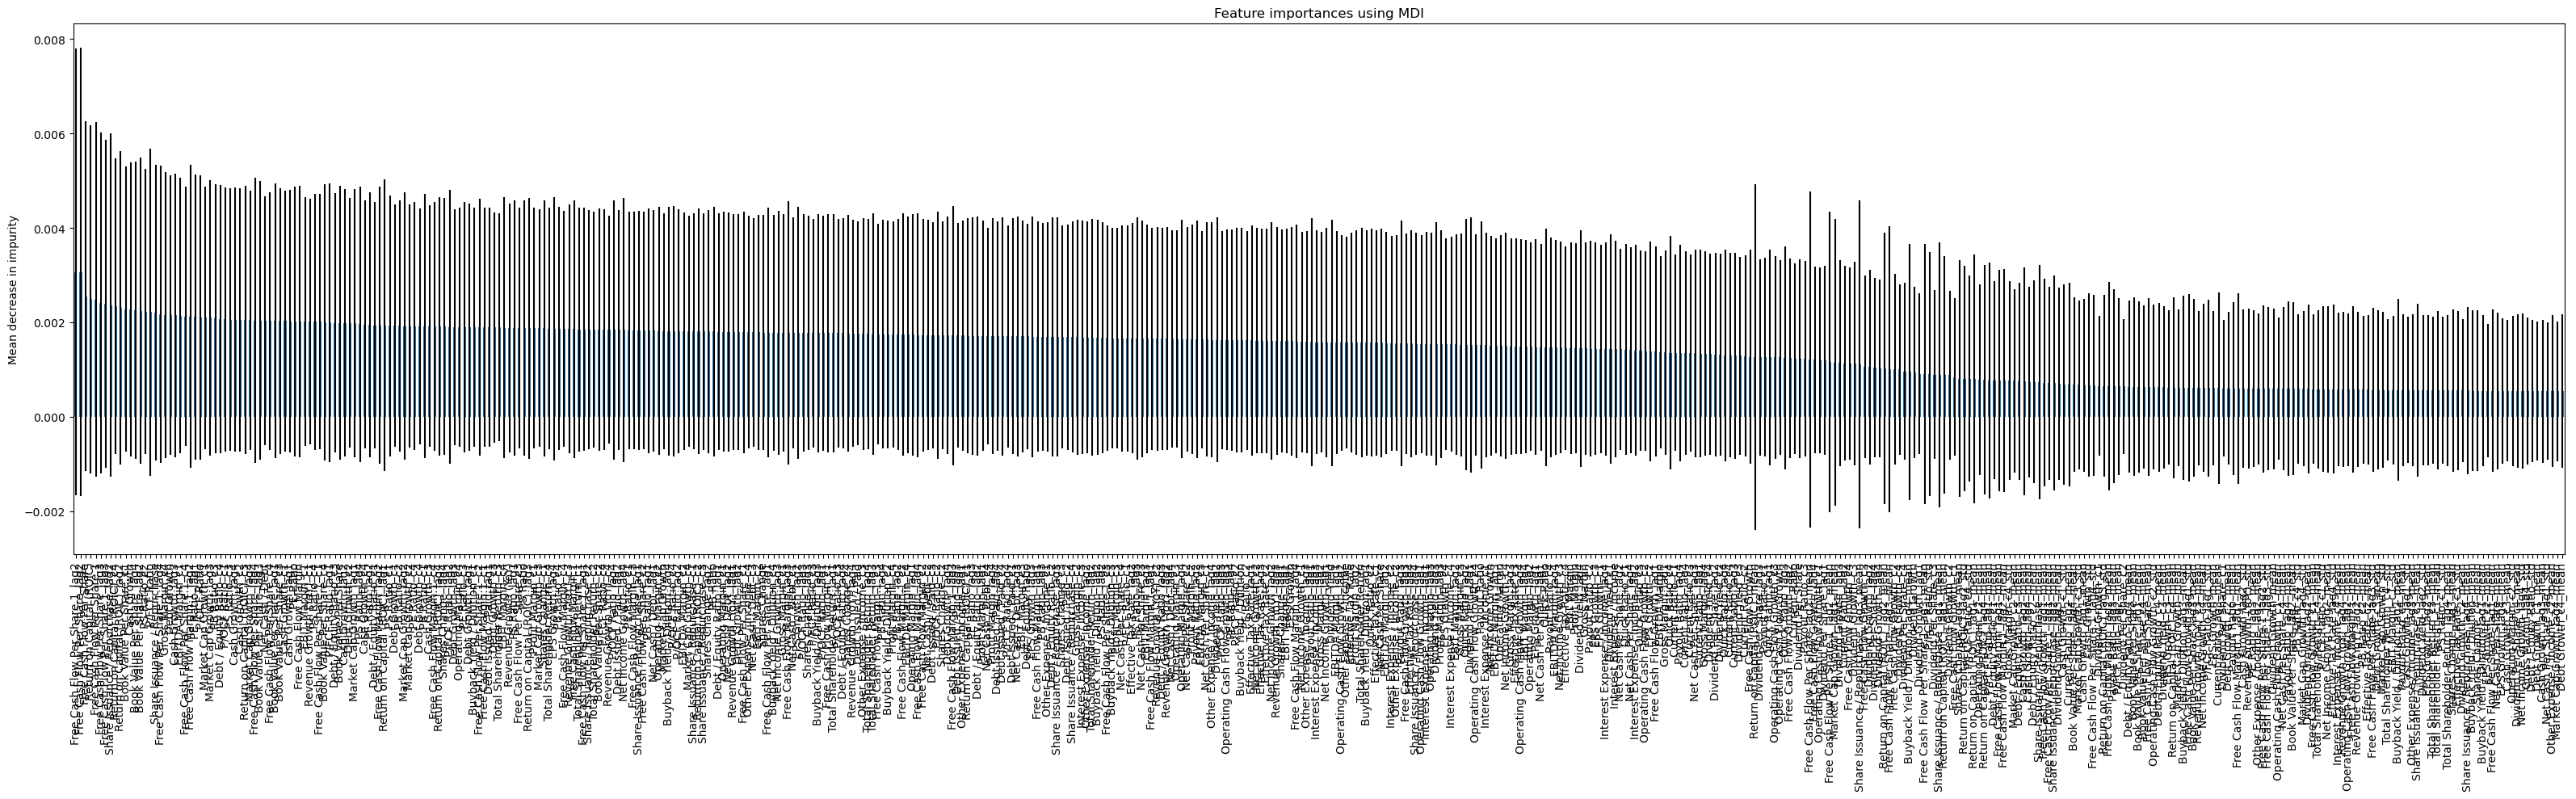

In [192]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
print(len(importances))
forest_importances = pd.DataFrame({"importances": importances, "std": std}, index=list(df_train.columns))
forest_importances = forest_importances.sort_values(by='importances', ascending=False)[:500]
plt.figure(figsize=(32,10))
fig, ax = plt.subplots(figsize=(32,10))
forest_importances.importances.plot.bar(yerr=forest_importances['std'].values, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('feature_importances_plot.png', dpi=600)